In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from fronteras import plot_fronteras_decision, mostrar_fronteras
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

%matplotlib inline

In [2]:
# Crear la carpeta 'data' en el directorio de trabajo y meter allí 'usuarios_win_mac_lin.csv'
df = pd.read_csv("data/usuarios_win_mac_lin.csv")
#coger sólo clases 0,1
df0_1 = df[df.clase.isin([0,1])]

In [3]:
df0_1.head(3)

,duracion,paginas,acciones,valor,clase
17,21.0,2,4,12,1
18,33.0,2,8,48,1
19,49.0,2,8,32,1


In [4]:
X1 = df0_1[['paginas','acciones']]
y1= df0_1.clase

In [5]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 0)
X1_train.head(2)

,paginas,acciones
84,9,18
82,4,32


In [6]:
mlr1 = linear_model.LogisticRegression()
mlr1.fit(X1_train.values, y1_train)

LogisticRegression()

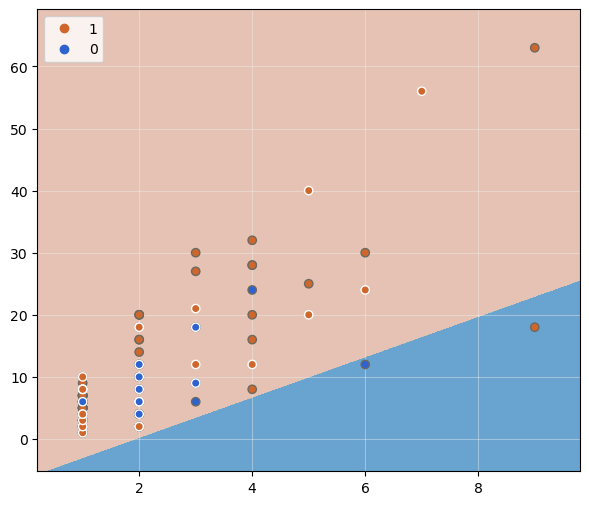

In [7]:
mostrar_fronteras(mlr1, X1_train.values, X1_test.values, y1_train, y1_test, df0_1.clase.unique())

In [8]:
df0_2 = df[df.clase.isin([1,2])]
X2 = df0_2[['paginas','acciones']]
y2= df0_2.clase
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 0)

In [9]:
mlr2 = linear_model.LogisticRegression()
mlr2.fit(X2_train.values, y2_train)

LogisticRegression()

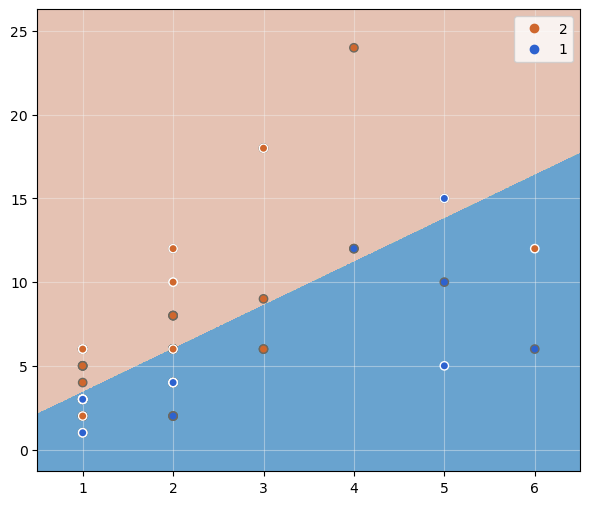

In [10]:
mostrar_fronteras(mlr2, X2_train.values, X2_test.values, y2_train, y2_test, df0_2.clase.unique())

In [11]:
df0_3 = df
X3 = df0_3[['paginas','acciones']]
y3= df0_3.clase
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state = 0)

In [12]:
mlr3 = linear_model.LogisticRegression()
mlr3.fit(X3_train.values, y3_train)

LogisticRegression()

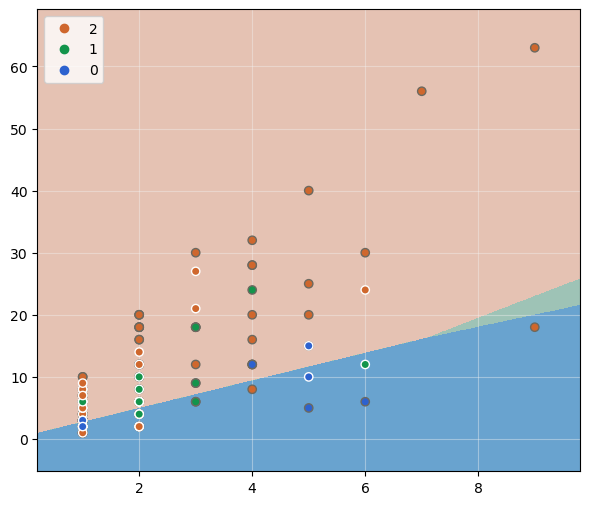

In [13]:
mostrar_fronteras(mlr3, X3_train.values, X3_test.values, y3_train, y3_test, df0_3.clase.unique())

### No parece que ninguna clase sea linealmente separable

In [14]:
train_scores = []
test_scores = []
for depth in range(1, 16):
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X1_train, y1_train)
    train_scores.append(model.score(X1_train, y1_train))
    test_scores.append(model.score(X1_test, y1_test))
test_scores

[0.65625,
 0.8125,
 0.84375,
 0.8125,
 0.90625,
 0.875,
 0.84375,
 0.84375,
 0.84375,
 0.84375,
 0.84375,
 0.84375,
 0.84375,
 0.84375,
 0.84375]

### se obtiene el mejor modelo para depth = 5

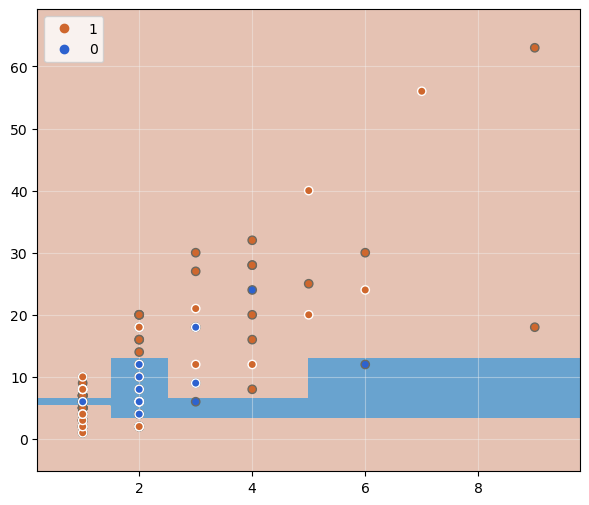

0.90625


In [15]:
model1 = DecisionTreeClassifier(max_depth = 5)
model1.fit(X1_train.values, y1_train)
score1= model1.score(X1_test.values, y1_test)
mostrar_fronteras(model1, X1_train.values, X1_test.values, y1_train, y1_test, df0_1.clase.unique())
print(score1)

máximo score para profundidad de:  2


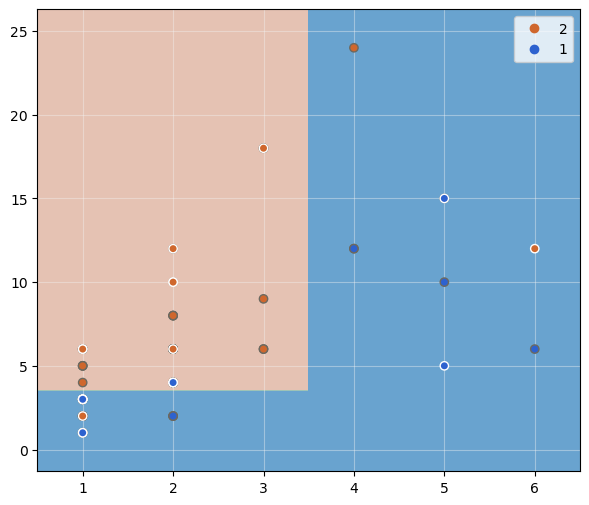

score : 0.8095238095238095


In [16]:
train_scores = {}
test_scores = {}
for depth in range(1, 16):
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X2_train, y2_train)
    train_scores[depth] = model.score(X2_train, y2_train)
    test_scores[depth] = model.score(X2_test, y2_test)

max_score_depth = max(test_scores, key = test_scores.get)    
# print(test_scores)
print('máximo score para profundidad de: ',max_score_depth)
model2 = DecisionTreeClassifier(max_depth = max_score_depth)
model2.fit(X2_train.values, y2_train)
score2= model2.score(X2_test.values, y2_test)
mostrar_fronteras(model2, X2_train.values, X2_test.values, y2_train, y2_test, df0_2.clase.unique())
print('score :',score2)

máximo score para profundidad de:  4


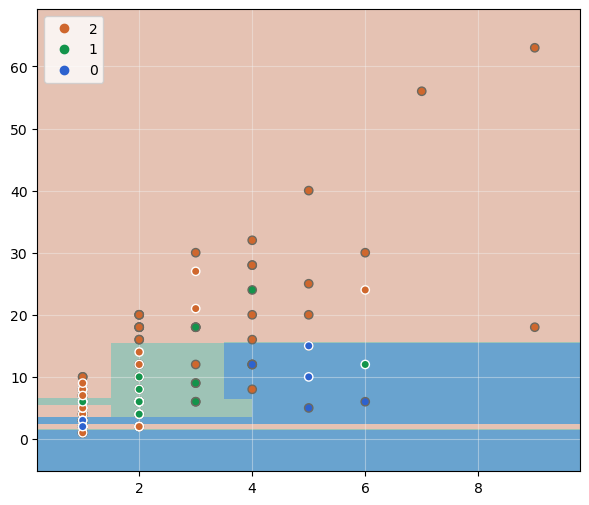

score : 0.6511627906976745


In [17]:
train_scores = {}
test_scores = {}
for depth in range(1, 16):
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X3_train, y3_train)
    train_scores[depth] = model.score(X3_train, y3_train)
    test_scores[depth] = model.score(X3_test, y3_test)

max_score_depth = max(test_scores, key = test_scores.get)    
# print(test_scores)
print('máximo score para profundidad de: ',max_score_depth)
model3 = DecisionTreeClassifier(max_depth = max_score_depth)
model3.fit(X3_train.values, y3_train)
score3= model3.score(X3_test.values, y3_test)
mostrar_fronteras(model3, X3_train.values, X3_test.values, y3_train, y3_test, df0_3.clase.unique())
print('score :',score3)

### Entre los modelos de ÁRBOLES DE DECISIÓN, 'model1' es el que mejor resultado da
### veamos el árbol creado

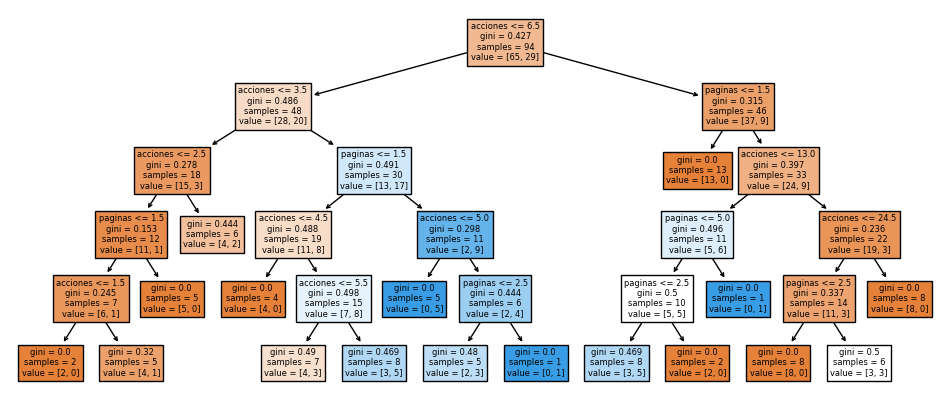

In [18]:
fig, ax = plt.subplots(figsize = (12, 5))
plot_tree(model1, filled = True, feature_names = X1.columns)
plt.show()

In [19]:
Xtest7=X1_test.iloc[[6]]
Xtest7

,paginas,acciones
76,2,2


In [20]:
model1.predict(Xtest7.values)

array([0], dtype=int64)

In [21]:
y1_test.iloc[[6]]

76    0
Name: clase, dtype: int64

In [22]:
model1.predict_proba(Xtest7.values)

array([[1., 0.]])